Arrhythmia on ECG Classification using CNN

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_df=pd.read_csv('/content/drive/MyDrive/archive/mitbih_train.csv',header=None)
test_df=pd.read_csv('/content/drive/MyDrive/archive/mitbih_test.csv',header=None)

In [ ]:
train_df[187]=train_df[187].astype(int)
equilibre=train_df[187].value_counts()
print(equilibre)

0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64


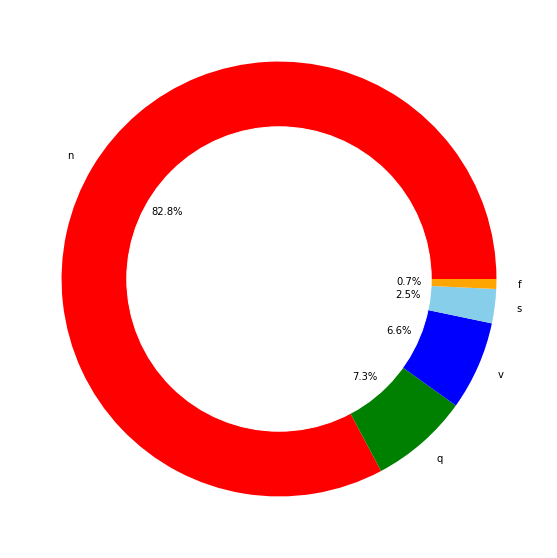

In [ ]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
from sklearn.utils import resample
df_1=train_df[train_df[187]==1]
df_2=train_df[train_df[187]==2]
df_3=train_df[train_df[187]==3]
df_4=train_df[train_df[187]==4]
df_0=(train_df[train_df[187]==0]).sample(n=20000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=20000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=20000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=20000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=20000,random_state=126)

train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

In [ ]:
equilibre=train_df[187].value_counts()
print(equilibre)

0    20000
1    20000
2    20000
3    20000
4    20000
Name: 187, dtype: int64


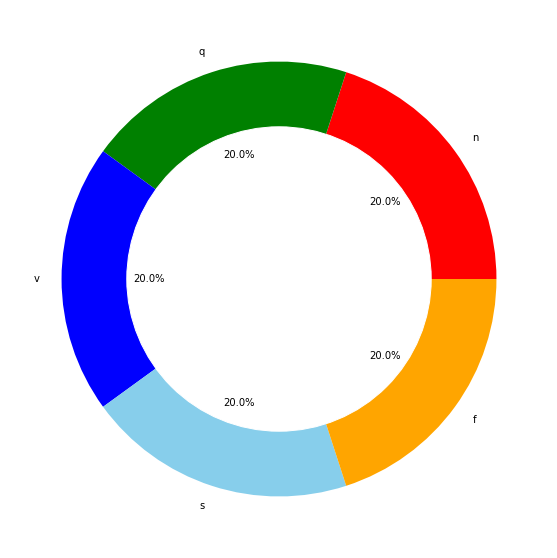

In [ ]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
target_train=train_df[187]
target_test=test_df[187]
y_train=to_categorical(target_train)
y_test=to_categorical(target_test)

In [ ]:
c=train_df.groupby(187,group_keys=False).apply(lambda train_df : train_df.sample(1))

In [ ]:
c

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
24147,0.997207,0.745810,0.511173,0.382682,0.223464,0.156425,0.064246,0.061453,0.039106,0.061453,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
72914,1.000000,0.686275,0.215686,0.081232,0.092437,0.067227,0.036415,0.022409,0.016807,0.022409,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
75310,0.781330,0.740409,0.497442,0.159847,0.002558,0.000000,0.047315,0.097187,0.086957,0.143223,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
80938,1.000000,0.742446,0.424460,0.145324,0.084892,0.120863,0.096403,0.073381,0.073381,0.056115,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
87196,1.000000,0.564394,0.598485,0.609848,0.606061,0.575758,0.537879,0.435606,0.310606,0.147727,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


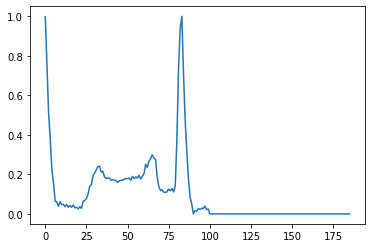

In [ ]:
 plt.plot(c.iloc[0,:186])

In [ ]:
def plot_hist(class_number,size,min_,bins):
    img=train_df.loc[train_df[187]==class_number].values
    img=img[:,min_:size]
    img_flatten=img.flatten()

    final1=np.arange(min_,size)
    for i in range (img.shape[0]-1):
        tempo1=np.arange(min_,size)
        final1=np.concatenate((final1, tempo1), axis=None)
    print(len(final1))
    print(len(img_flatten))
    plt.hist2d(final1,img_flatten, bins=(bins,bins),cmap=plt.cm.jet)
    plt.show()

1300000
1300000


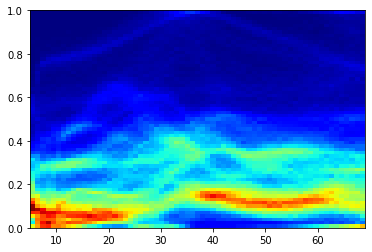

In [ ]:
plot_hist(0,70,5,65)

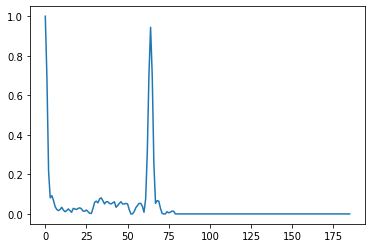

In [ ]:
 plt.plot(c.iloc[1,:186])

900000
900000


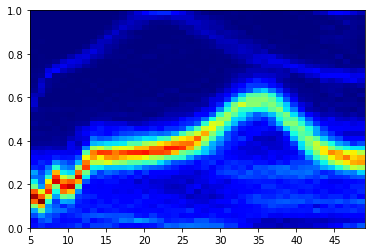

In [ ]:
plot_hist(1,50,5,45)

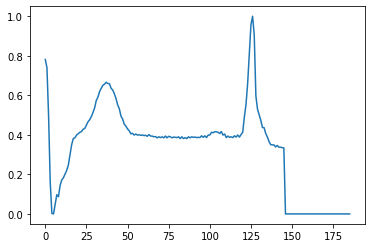

In [ ]:
plt.plot(c.iloc[2,:186])

900000
900000


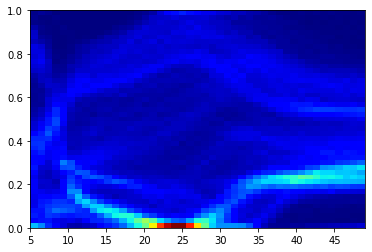

In [ ]:
plot_hist(2,50,5,45)

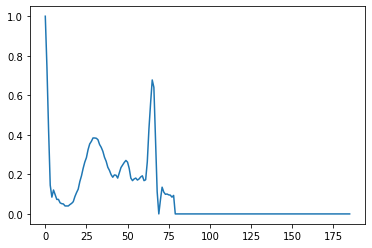

In [ ]:
plt.plot(c.iloc[3,:186])

900000
900000


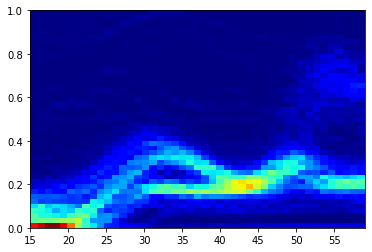

In [ ]:

plot_hist(3,60,15,45)

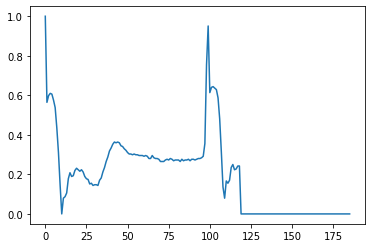

In [ ]:
plt.plot(c.iloc[4,:186])

700000
700000


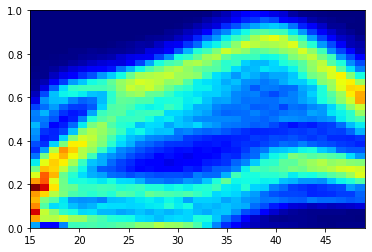

In [ ]:
plot_hist(4,50,15,35)

pretreat

In [ ]:
def add_gaussian_noise(signal):
    noise=np.random.normal(0,0.5,186)
    return (signal+noise)

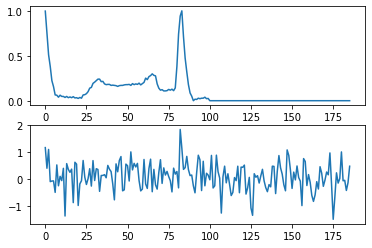

In [ ]:
tempo=c.iloc[0,:186]
bruiter=add_gaussian_noise(tempo)

plt.subplot(2,1,1)
plt.plot(c.iloc[0,:186])

plt.subplot(2,1,2)
plt.plot(bruiter)

plt.show()

In [ ]:
target_train=train_df[187]
target_test=test_df[187]
y_train=to_categorical(target_train)
y_test=to_categorical(target_test)

In [ ]:
X_train=train_df.iloc[:,:186].values
X_test=test_df.iloc[:,:186].values
for i in range(len(X_train)):
    X_train[i,:186]= add_gaussian_noise(X_train[i,:186])
X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)

In [ ]:
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout
from keras.layers import Input
from keras.models import Model
# from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint


In [ ]:
def network(X_train,y_train,X_test,y_test):
    

    im_shape=(X_train.shape[1],1)
    inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')
    conv1_1=Convolution1D(64, (6), activation='relu', input_shape=im_shape)(inputs_cnn)
    conv1_1=BatchNormalization()(conv1_1)
    pool1=MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)
    conv2_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool1)
    conv2_1=BatchNormalization()(conv2_1)
    pool2=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_1)
    conv3_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool2)
    conv3_1=BatchNormalization()(conv3_1)
    pool3=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_1)
    flatten=Flatten()(pool3)
    dense_end1 = Dense(64, activation='relu')(flatten)
    dense_end2 = Dense(32, activation='relu')(dense_end1)
    main_output = Dense(5, activation='softmax', name='main_output')(dense_end2)

    model = Model(inputs= inputs_cnn, outputs=main_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])
    
    
    callbacks = [EarlyStopping(monitor='val_loss', patience=8),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

    history=model.fit(X_train, y_train,epochs=40,callbacks=callbacks, batch_size=32,validation_data=(X_test,y_test))
    model.load_weights('best_model.h5')
    return(model,history)

In [ ]:
model,history=network(X_train,y_train,X_test,y_test)

Epoch 1/40
3125/3125 [==============================] - 31s 6ms/step - loss: 0.9006 - accuracy: 0.6553 - val_loss: 1.1615 - val_accuracy: 0.5717
Epoch 2/40
3125/3125 [==============================] - 20s 6ms/step - loss: 0.7966 - accuracy: 0.6979 - val_loss: 0.8858 - val_accuracy: 0.6891
Epoch 3/40
3125/3125 [==============================] - 20s 6ms/step - loss: 0.7631 - accuracy: 0.7103 - val_loss: 0.8929 - val_accuracy: 0.6649
Epoch 4/40
3125/3125 [==============================] - 21s 7ms/step - loss: 0.7364 - accuracy: 0.7199 - val_loss: 0.7846 - val_accuracy: 0.7271
Epoch 5/40
3125/3125 [==============================] - 20s 6ms/step - loss: 0.7127 - accuracy: 0.7286 - val_loss: 0.7674 - val_accuracy: 0.7369
Epoch 6/40
3125/3125 [==============================] - 19s 6ms/step - loss: 0.6892 - accuracy: 0.7383 - val_loss: 0.7888 - val_accuracy: 0.6741
Epoch 7/40
3125/3125 [==============================] - 20s 6ms/step - loss: 0.6629 - accuracy: 0.7485 - val_loss: 0.7682 - val_ac

In [ ]:
def evaluate_model(history,X_test,y_test,model):
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    
    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    target_names=['0','1','2','3','4']
    
    y_true=[]
    for element in y_test:
        y_true.append(np.argmax(element))
    prediction_proba=model.predict(X_test)
    prediction=np.argmax(prediction_proba,axis=1)
    cnf_matrix = confusion_matrix(y_true, prediction)

Accuracy: 70.86%


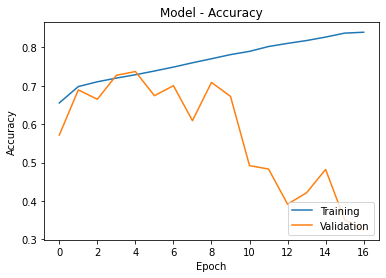

685/685 [==============================] - 1s 2ms/step


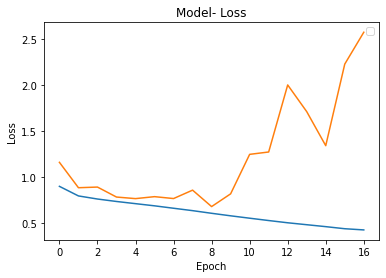

In [ ]:
evaluate_model(history,X_test,y_test,model)
y_pred=model.predict(X_test)

In [ ]:
preds=model.predict(X_test)

685/685 [==============================] - 3s 5ms/step


In [ ]:
pred_classes=[]

In [ ]:
for i in preds:
  pred_classes.append(i.argmax())

In [ ]:
pred_classes

In [ ]:
abnormal_df=pd.read_csv("/content/drive/MyDrive/archive/ptbdb_abnormal.csv")

In [ ]:
abnormal_df.head()

,9.322328567504882812e-01,8.696785569190979004e-01,8.861859440803527832e-01,9.296264052391052246e-01,9.087749719619750977e-01,9.339704513549804688e-01,8.010425567626953125e-01,7.497828006744384766e-01,6.872285008430480957e-01,6.350998878479003906e-01,...,0.000000000000000000e+00.117,0.000000000000000000e+00.118,0.000000000000000000e+00.119,0.000000000000000000e+00.120,0.000000000000000000e+00.121,0.000000000000000000e+00.122,0.000000000000000000e+00.123,0.000000000000000000e+00.124,0.000000000000000000e+00.125,1.000000000000000000e+00.1
0,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.925265,0.433352,0.073620,0.079197,0.136643,0.182934,0.182934,0.182376,0.196877,0.203569,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
abnormal=abnormal_df.iloc[:,:186].values

In [ ]:
y=np.expand_dims(abnormal,axis=2)

In [ ]:
y.shape

(10505, 186, 1)

In [ ]:
abnormal_pred=model.predict(y)

329/329 [==============================] - 1s 3ms/step


In [ ]:
abnormal_pred.shape

(10505, 5)

In [ ]:
abnormal_pred_classes=[]

In [ ]:
for i in abnormal_pred:
  abnormal_pred_classes.append(i.argmax())

In [ ]:
# predicted=0
pred_0=y[0]
pred_1=y[2]
pred_2=y[7]
pred_3=y[10]
pred_4=y[3]

In [ ]:
pred_0_to_4= [pred_0,pred_1,pred_2,pred_3,pred_4]

In [83]:
pred_4

array([[0.93561786],
       [0.80166149],
       [0.80581516],
       [1.        ],
       [0.72274143],
       [0.48078921],
       [0.45482865],
       [0.31983384],
       [0.26687434],
       [0.30841121],
       [0.28556594],
       [0.34371755],
       [0.28141224],
       [0.28141224],
       [0.28348911],
       [0.28141224],
       [0.31983384],
       [0.31152648],
       [0.28348911],
       [0.27829698],
       [0.27414331],
       [0.31775701],
       [0.26791278],
       [0.27518171],
       [0.28037384],
       [0.25545171],
       [0.31360331],
       [0.26687434],
       [0.24402907],
       [0.19833852],
       [0.19210799],
       [0.19003116],
       [0.1349948 ],
       [0.08618899],
       [0.07892004],
       [0.03634476],
       [0.02492212],
       [0.        ],
       [0.04465213],
       [0.02492212],
       [0.06645899],
       [0.0913811 ],
       [0.07372794],
       [0.1204569 ],
       [0.14018692],
       [0.13707165],
       [0.17653167],
       [0.145

In [ ]:
pred_0

array([[1.        ],
       [0.6069411 ],
       [0.38418078],
       [0.25423729],
       [0.2235674 ],
       [0.27683616],
       [0.25343019],
       [0.18482648],
       [0.15334947],
       [0.12187248],
       [0.12510088],
       [0.1291364 ],
       [0.13720742],
       [0.13720742],
       [0.13236481],
       [0.12671509],
       [0.15819208],
       [0.15254237],
       [0.13236481],
       [0.16868442],
       [0.15657789],
       [0.18321227],
       [0.19128329],
       [0.20419693],
       [0.23002422],
       [0.24455206],
       [0.2857143 ],
       [0.30750605],
       [0.32122681],
       [0.32768363],
       [0.3518967 ],
       [0.37368846],
       [0.39709443],
       [0.36319613],
       [0.34059724],
       [0.30750605],
       [0.2582728 ],
       [0.19774011],
       [0.19935432],
       [0.17352703],
       [0.14769976],
       [0.13559322],
       [0.13397902],
       [0.10573043],
       [0.12187248],
       [0.13559322],
       [0.10653753],
       [0.148

In [ ]:
abnormal_pred_classes

In [ ]:
model.save